#### Save model to Huggingface Hub  

Load trained model from checkpoint and push to HF Hub

In [1]:
import argparse
import sys
import warnings
import yaml

from huggingface_hub import notebook_login
from transformers.models.mt5 import MT5Tokenizer
import pandas as pd

sys.path.append('..')  # Allow import of project packages
from text_summarizer.data.motions_data_module import MotionsDataModule
from text_summarizer.models import t5
from text_summarizer.lit_models import MT5LitModel
from text_summarizer.util import summarize

warnings.filterwarnings('ignore')
pd.set_option('display.max_colwidth', 500)

BASE_PATH = "../training/logs/lightning_logs/version_2/"
MODEL_PATH = BASE_PATH + "checkpoints/epoch=008-val_loss=1.36.ckpt"
HPARAMS_PATH =  BASE_PATH + "hparams.yaml"

HF_USERNAME = "erikgrip2"
HF_MODEL_NAME= "mt5-finetuned-for-motion-title"

In [2]:
with open(HPARAMS_PATH, "r") as hparams_file:
   lightning_config = argparse.Namespace(**yaml.load(hparams_file, Loader=yaml.Loader))

model = t5.MT5(data_config={}, args=lightning_config)

lit_model = MT5LitModel.load_from_checkpoint(
    checkpoint_path=MODEL_PATH,
    model=model,
)
lit_model.eval()

tokenizer = MT5Tokenizer.from_pretrained(model.model_name)

In [3]:
SAVE_DIR = '../text_summarizer/artifacts'
tokenizer.save_pretrained(SAVE_DIR)
lit_model.model.model.save_pretrained(SAVE_DIR)

In [4]:
notebook_login()

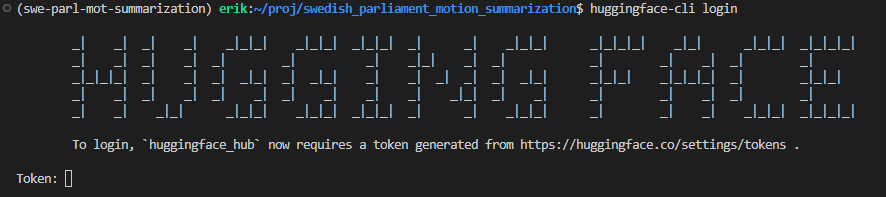

In [5]:
lit_model.model.model.push_to_hub(HF_USERNAME + "/" + HF_MODEL_NAME)

ValueError: You must login to the Hugging Face hub on this computer by typing `transformers-cli login` and entering your credentials to use `use_auth_token=True`. Alternatively, you can pass your own token as the `use_auth_token` argument.

In [7]:
import ipywidgets

ipywidgets.__version__

'8.0.4'

0